In [1]:
pip install pydsm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 552 kB 7.4 MB/s 
  Created wheel for pydsm: filename=pydsm-0.14.0.0-cp37-cp37m-linux_x86_64.whl size=684736 sha256=23b4373e31c1d53c9583bbac12d6eab6069ae625c030215775cfa1942d5ae0c1
  Stored in directory: /root/.cache/pip/wheels/1d/37/8e/15939ed2fb3dcf8bbab167a0bf7c7155c2e6fa4df16d490260
Successfully built pydsm


# TODO LIST

* для задачи 1.1 придумать, как находить ширину главного лепестка и частоты, на которых происходят скачки, заполнить тааблицу
* для задачи 1.3 продифференцировать аналитическую функцию, закодить сравнение с аналитическим решением
* для задачи 1.4 ответить на вопросы
* для задачи 1.5 заполнить таблицу
* для всех задач написать теоретические выкладки

In [80]:
import pydsm
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy.optimize import fmin,fminbound

# ATTENTION!

Из-за того, что в коде в разные моменты времени одни и те же переменные могут обозначать разные сущности, крайне рекомендуется исполнять код последоваетльно сверху вниз, в противном случае, вы можете получить удивительные результаты.

In [81]:
# зададим константы
N = 9
L = 2
nu_0 = -0.1

In [82]:
# зададим посследовательность отсчетов
k = np.array(range(N))

# функция 1[k]
def single_impulse(k):
  if k == 0: return 1
  else: return 0

# функция, возвращающая последовательность дискретных сигналов (принимает количество сигналов в последовательности)
def x_k(M):
  x_k = np.full((M), 0.0)
  for k in range(len(x_k)):
    for m in range(N):
      x_k[k] += single_impulse(k-m)
  return x_k

В данной работе мы будем пользоваться библиотечной функцией дискретного во времени преобразования Фурье (дальше ДВПФ) пакета pydsm. 

Для последовательности отсчетов $x[k]$ ДВПФ записывается следующим образом:
$$X(\nu) = \sum_{-∞}^{+∞} x[k] e^{-2j \pi \nu k}$$
где $\nu = \frac{f}{f_{\text{д}}}$ -- приведенная частота ($f_{\text{д}}$ --  частота дескритизации).

Рассматриваем последовательность отсчетов
$$x[k] = \sum_{m = 0}^{N-1} 1[k - m]$$
Данная последовательность представляет собой единичные сигналы в моменты времени $k$. Запишем ДВПФ для этой последовательности отсчетов:
$$X(\nu) = \sum_{-∞}^{+∞} x[k] e^{-2j \pi \nu k} = \sum_{-∞}^{+∞} \sum_{m = 0}^{N-1} 1[k - m] e^{-2j \pi \nu k}$$
Для функции $1[k]$ справедливо:
$$
1[k] = 
\begin{cases}
1, ~~~ k=0      \\
0, ~~~ k \neq 0 \\
\end{cases}
$$
Такоим образом,
$$X(\nu) = \sum_{k=0}^{N-1} \sum_{m = 0}^{N-1} 1[k - m] e^{-2j \pi \nu k} = e^{-2j \pi \nu \cdot 9} + e^{-2j \pi \nu \cdot 8} + \dots + e^{-2j \pi \nu} + 1$$
Воспользуемся формулой геометрической прогрессии и получим:
$$X(\nu) = \frac{1 - e^{-2j \pi \nu \cdot N}}{1 - e^{-2j \pi \nu}} = e^{-j \pi \nu (N-1)} \frac{\sin \pi \nu N}{\sin \pi \nu}$$

In [83]:
# ДВПФ для заданной последовательности (функция от nu)
X = pydsm.ft.dtft(x_k(N+10))

In [84]:
# диапазон приведенных частот
nu_range = np.linspace(-0.5, 0.5, 1000)

X_abs_range = np.array([abs(X(nu)) for nu in nu_range])
X_arg_range = np.angle([X(nu) for nu in nu_range])

In [ ]:
# abs_X = lambda nu : abs(X(nu))
# min_global = fminbound (abs_X,-0.2,0.2) # Минимальное значение этой области
# # min1 = fmin(X, 0.2)
# # print(min1)
# print(min_global)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


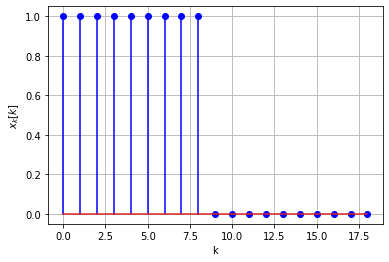

In [85]:
plt.stem(np.array(range(len(x_k(N+10)))), x_k(N+10), 'b', 'bo')
plt.xlabel('k') 
plt.ylabel(r'$x_k[k]$') 
plt.grid()

Построим графики модуля и аргумента ДВПФ от заданного дискретного сигнала.

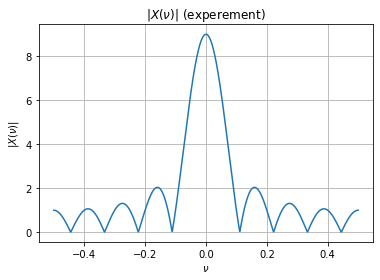

In [60]:
plt.plot(nu_range, X_abs_range)
plt.title(r'$|X(\nu)|$ (experement)')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')
plt.grid()

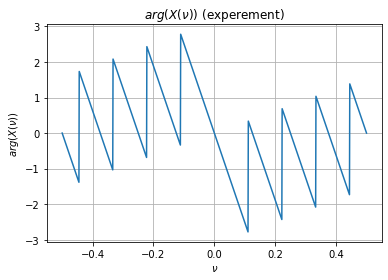

In [62]:
plt.plot(nu_range, X_arg_range)
plt.title(r'$arg(X(\nu))$ (experement)')
plt.ylabel(r'$arg(X(\nu))$')
plt.xlabel(r'$\nu$')
plt.grid()

Сравним полученные результаты с теоретическим расчетом.

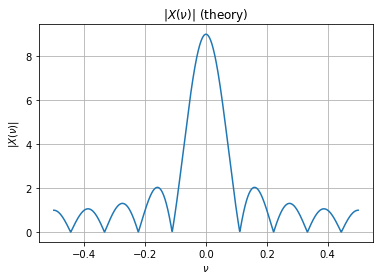

In [63]:
analytic_Xn = lambda nu : (1 - np.exp(- 2j * math.pi * nu * N)) / (1 - np.exp(- 2j * math.pi * nu))

plt.plot(nu_range, abs(analytic_Xn(nu_range)))
plt.title(r'$|X(\nu)|$ (theory)')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')
plt.grid()

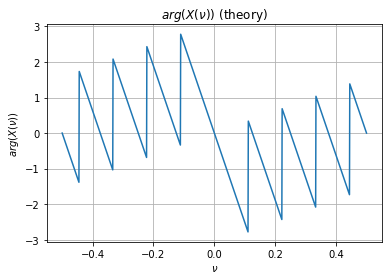

In [64]:
plt.plot(nu_range, np.angle(analytic_Xn(nu_range)))
plt.title(r'$arg(X(\nu))$ (theory)')
plt.ylabel(r'$arg(X(\nu))$')
plt.xlabel(r'$\nu$')
plt.grid()

* значение $|X(0)|$
* ширина $\Delta \nu$ главного лепетка на нулевом уровне
* точки скачков фазы на $\pi$
* энергия $x \Delta t = \int_{0.5}^{-0.5} |X(\nu)|^2 \ \nu$

 Изучим свойство масштабируемости. Рассмотрим последовательность 
 $$x_L[k] = \sum_{m = 0}^{N-1} 1[k - Lm]$$
 между двумя последовательными единичными сигналами добавляем нулевой.

In [11]:
# по аналогии с 1.1 зададим последовательность сигналов x_L (функция принимает количество сигналов в последовательности)
def x_L(M):
  x_L = np.full((M), 0.0)
  for k in range(len(x_L)):
    for m in range(N):
      x_L[k] += x_k(M)[m] * single_impulse(k - m*L)
  return x_L

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


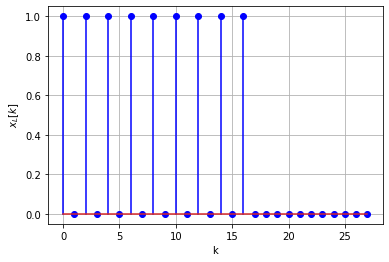

In [41]:
plt.stem(np.array(range(len(x_L(2*N+10)))), x_L(2*N+10), 'b', 'bo')
plt.xlabel('k') 
plt.ylabel(r'$x_L[k]$') 
plt.grid()

In [66]:
X = pydsm.ft.dtft(x_L(N+10))

nu_range = np.linspace(-0.5, 0.5, 1000)
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])

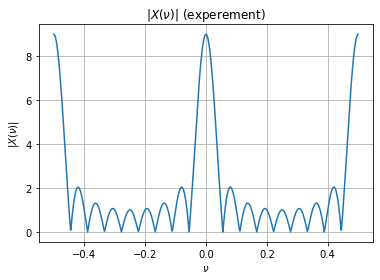

In [67]:

plt.plot(nu_range, X_abs_range)
plt.title(r'$|X(\nu)|$ (experement)')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')
plt.grid()

Сравним полученные результаты с теоретическим расчетом.

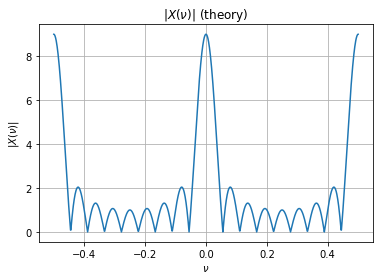

In [68]:
plt.plot(nu_range, abs(analytic_Xn(nu_range * L)))
plt.title(r'$|X(\nu)|$ (theory)')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


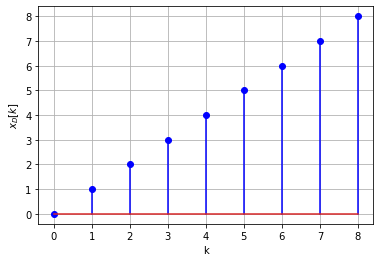

In [69]:
x_D = x_k(N) * k

plt.stem(k, x_D, 'b', 'bo')
plt.xlabel('k') 
plt.ylabel(r'$x_D[k]$') 
plt.grid()

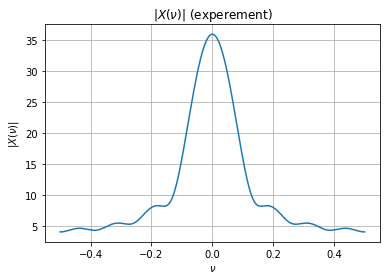

In [71]:
X = pydsm.ft.dtft(x_D)

nu_range = np.linspace(-0.5, 0.5, 1000)
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])

plt.plot(nu_range, X_abs_range)
plt.title(r'$|X(\nu)|$ (experement)')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')
plt.grid()

## Для выполнения задания **
# едиснтвенный вариант -- запрогать функцию самостоятельно,

#### Task 1.3 compare with analytic result!!!!

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


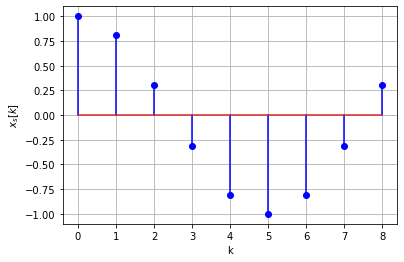

In [72]:
x_s = x_k(N) * np.exp(2j * math.pi * nu_0 * k)

plt.stem(k, x_s, 'b', 'bo')
plt.xlabel('k') 
plt.ylabel(r'$x_s[k]$') 
plt.grid()

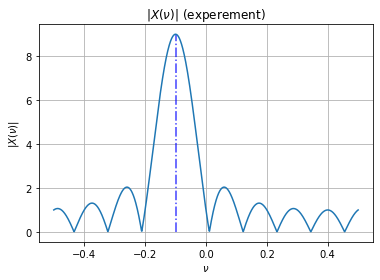

In [79]:
X = pydsm.ft.dtft(x_s)
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])

plt.plot(nu_range, X_abs_range)
plt.vlines(nu_0, 0, max(X_abs_range), ls='-.', color='blue', alpha=0.75)

plt.title(r'$|X(\nu)|$ (experement)')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')
plt.grid()

Умножение сигнала на комплексную экспоненту $e^{-2j \pi \nu_0 k}$ (с собственной частотой $\nu_0$) приводит к сдвигу спектральной функции по оси абцисс на величину $\nu_0$ (вправо, если $\nu_0$ > 0 и влево в противном случае). В справедливости этого свойства можно убедиться непосредственной подстановкой полученного дискретного сигнала в формулу ДВПФ.

Заметим, что таким образом мы получаем дискретный гармонический сигнал с собственной приведенной частотой $\nu_0$. Таким образом, по спектру мы можем определить дискретный гармонический сигнал и его собственную частоту.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


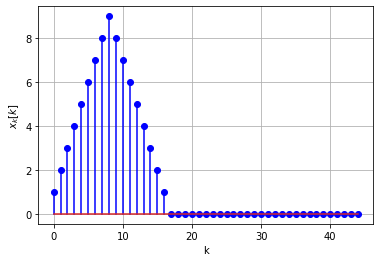

In [75]:
# зададим функцию свертки двух произвольных дискретных сигналов sid1_k и sig2_k (M -- количество импульсов в результируещем ряде)
def convolution(sig1_k, sig2_k, M):
  x = np.full((M), 0.0)
  for k in range(len(x)):
    for m in range(N):
      x[k] += sig1_k(M)[m] * sig2_k(M)[k-m]
  return x

# print(convolution(x_k, x_k, 5*N))

plt.stem(np.array(range(len(convolution(x_k, x_k, 5*N)))), convolution(x_k, x_k, 5*N), 'b', 'bo')
plt.xlabel('k') 
plt.ylabel(r'$x_k[k]$') 
plt.grid()

In [76]:
X = pydsm.ft.dtft(convolution(x_k, x_k, 5*N))

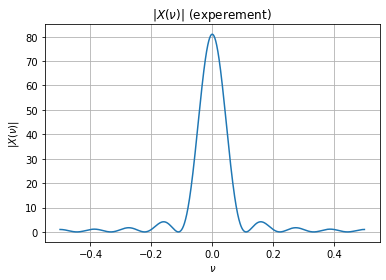

In [77]:
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])

plt.plot(nu_range, X_abs_range)
plt.title(r'$|X(\nu)|$ (experement)')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')
plt.grid()

Сравним с теоретическими результатами

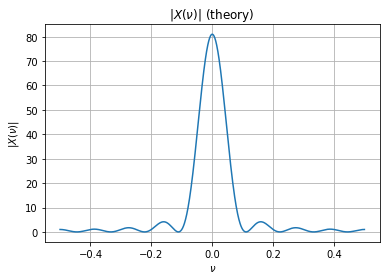

In [78]:
X = pydsm.ft.dtft(x_k(N)) # ДВПФ для одного дискретного сигнала 
analytic_convolution = lambda nu : X(nu)**2

X_abs_range = np.array([abs(analytic_convolution(nu)) for nu in nu_range])

plt.plot(nu_range, X_abs_range)
plt.title(r'$|X(\nu)|$ (theory)')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')
plt.grid()